In [1]:
#%%
import numpy as np
import matplotlib.pyplot as plt
from cicTools import *
from scipy import spatial
import configparser

config = configparser.ConfigParser()
config.read('config.ini')

seed = int(config['PARAMS']['seed']) #random seed
lbox = float(config['PARAMS']['lbox']) #length of box
ngxs = int(config['PARAMS']['ngxs']) #num of galaxies
zspace = config['PARAMS'].getboolean('zspace') #redshift space
zspaceAxis = config['PARAMS']['zspaceAxis'] #r-space axis
nesf = int(config['PARAMS']['nesf']) #num of test spheres
rsbin = int(config['PARAMS']['rsbin']) #num of bins of r of the spheres

print(f"""
      ngxs = {ngxs}
      nesf = {nesf}
      zspace = {zspace}
      zspaceAxis = {zspaceAxis}
      """)



      ngxs = 0
      nesf = 100000
      zspace = False
      zspaceAxis = z
      


In [13]:

#%%
rs = np.geomspace(40,4000,rsbin) 

#pos = np.column_stack((gxs['x'],gxs['y'],gxs['z']))

DM = np.load('../data/dmpos_diluted.npz')
pos = DM['arr_0']
#pos = np.column_stack((pos1[:,0],pos1[:,1],pos1[:,2]))
vel = DM['arr_1']

#if zspace == True:
H0 = .06774
#axis = zspaceAxis
#vaxis = 'v'+axis
pos[:,0]+=vel[:,0]/H0
pos[:,0][np.where(pos[:,0]<0.)[0]]+=lbox
pos[:,0][np.where(pos[:,0]>lbox)[0]]-=lbox


tree = spatial.cKDTree(pos)
#tree1 = spatial.cKDTree(pos1)

In [18]:
a=np.load('../data/dmpos_diluted.npz')
a['arr_1']

array([[  223.22084 ,  -174.67581 , -1341.0198  ],
       [ -581.2166  ,  -584.0538  ,  -600.8033  ],
       [ 1008.60126 ,   795.949   ,  -598.4159  ],
       ...,
       [  -67.09165 ,   -14.306187,   -63.54265 ],
       [  -48.488445,   265.9276  ,  -302.8825  ],
       [  203.00832 ,  -221.67429 ,    72.77496 ]], dtype=float32)

In [14]:


chi = np.zeros(len(rs))
NXi = np.zeros(len(rs))
P0 = np.zeros(len(rs))
N_mean = np.zeros(len(rs))
xi_mean = np.zeros(len(rs))

for i,r in enumerate(rs):
    chi[i], NXi[i], P0[i], N_mean[i], xi_mean[i] = cic_stats(tree1, nesf, r, lbox)

##########
# Writing
##########
#if ngxs!=0:
#    namefile = f'../data/ngxs{ngxs}_nesf{nesf}'
#else:
#    namefile = f'../data/allgxs_nesf{nesf}'
#if zspace==True: 
#    namefile += f'_redshift{axis}'
#namefile += '.npz'

namefile = 'DMdata.npz'
print(f'Creating {namefile}')
np.savez(namefile,P0,N_mean,xi_mean,rs)


/media/fdavilakurban/0a842929-67de-4adc-b64c-8bc6d17a08b0/fdavilakurban/Proyectos/VPF/codes/cicTools.py:47: RuntimeWarning: divide by zero encountered in log
  chi = -np.log(P0)/N_mean


Creating DMdata.npz


/home/fdavilakurban/anaconda2/envs/fede3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


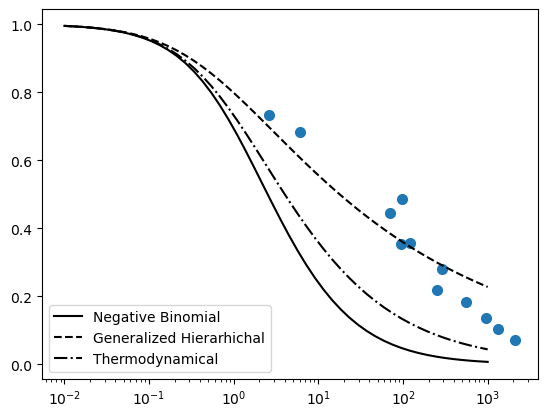

In [15]:
import numpy as np

data = np.load('DMdata.npz')

P0=data['arr_0']
N_mean = data['arr_1']
xi_mean = data['arr_2']
rs = data['arr_3']

import matplotlib.pyplot as plt
##########
# Plotting
##########
x = np.geomspace(1E-2,1E3,50)
c='k'
chi = -np.log(P0)/N_mean
NE = N_mean*xi_mean

plt.plot(x,np.log(1+x)/x,label='Negative Binomial',c=c)
a=.2
plt.plot(x,(1/((1-a)*(x/a)))*((1+x/a)**(1-a)-1),label='Generalized Hierarhichal',c=c,ls='--')
#plt.plot(x,(1-np.e**(-x))/x,label='Minimal')
plt.plot(x,(np.sqrt(1+2*x)-1)/x,label='Thermodynamical',c=c,ls='-.')
#plt.plot(x[:-15],1-x[:-15]/2,label='Gauss',c=c)
# Q=1
# plt.plot(x,1-(np.euler_gamma+np.log(4*Q*x))/(8*Q),label='BBGKY',c=c,ls=':')

plt.scatter(NE,chi,lw=2)
plt.xscale('log')
plt.legend(loc=3)
plt.show()
# %%
